# Generating synthetic temporal data 
Inorder to show the application of recurrent neural networks (RNNs) we need data that is only correctly predicted when a memory of past events is present.

We will build data were predicting the next frame is ambigious given a single instance, but is predictable when multiple chronological instances are used.  

## The data
The data will of a moving box:
![box data](images/box.gif)

## The Task
To predict the next position of the box:
![box predict](images/box_predict.png)

## The need for temporal memory in predicting the box
As you can probebly see, the next position of the box is abigious based on a single frame, i.e you have no gauranteed way of correctly predicting the direction of the box based on a single frame:
![box predict](images/abig_predict.png)

**However** if your model maintains a memory of the previous input, it can use that information to predict correctly:
![box memory](images/temp_box.png)

This is what an RNN does.

Lets create this synthetic data:

### Inport libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Functions to draw box in matrix

In [2]:
# %%writefile box_gen.py

import numpy as np
from PIL import Image, ImageDraw

FRAME_SIZE = [5,50]
BOX_WIDTH = 3


def get_rect(x, y, width, height):
    rect = np.array([(0, 0), (width-1, 0), (width-1, height-1), (0, height-1), (0, 0)])
    offset = np.array([x, y])
    transformed_rect = rect + offset
    return transformed_rect

def get_array_with_box_at_pos(x):
    data = np.zeros(FRAME_SIZE)
    img = Image.fromarray(data)
    draw = ImageDraw.Draw(img)
    rect = get_rect(x=x, y=1, width=BOX_WIDTH, height=BOX_WIDTH)
    draw.polygon([tuple(p) for p in rect], fill=1)
    new_data = np.asarray(img)
    return new_data

## Use functions to generate data sequence

In [3]:
sway_offset = 1
sway_start = sway_offset
sway_end = (FRAME_SIZE[1]-1) - BOX_WIDTH
sway_range = sway_end - sway_offset
sway_start, sway_end, sway_range

(1, 46, 45)

### Create movement pattern

In [4]:
DATA_POINTS = 100

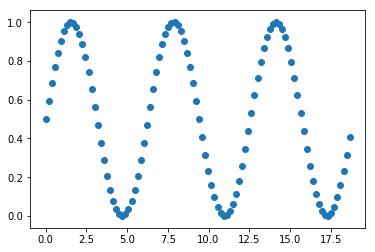

In [5]:
base = (np.arange(DATA_POINTS)/DATA_POINTS)* 6 *np.pi
sined = (np.sin(base) + 1 )/2
plt.scatter(base, sined)
plt.show()

In [6]:
def sin_to_pos(sin_val):
    return (sin_val*sway_range)+sway_offset

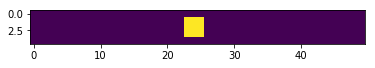

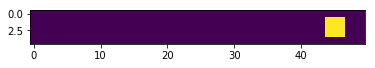

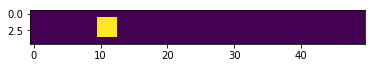

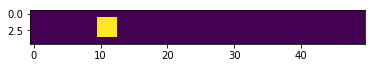

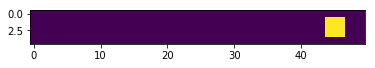

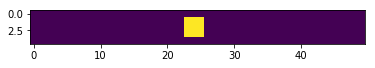

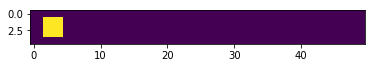

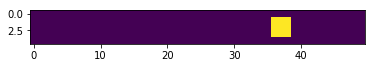

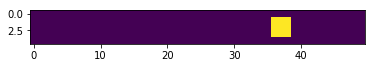

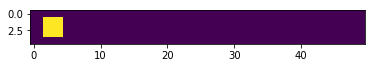

In [7]:
frames = []

print_every_n_frames = DATA_POINTS//10
for i,t in enumerate(sined):
    frame = get_array_with_box_at_pos(sin_to_pos(t))
    if(i % print_every_n_frames)==0:
        plt.imshow(frame, interpolation='nearest')
        plt.show()
    frames.append(frame)

## Export data

In [8]:
y = sin_to_pos(sined[1:])
X = frames[:-1]

len(X), len(y)

(99, 99)

In [18]:
with open('sliding_square_target.npy', 'wb') as file:
    np.save(arr=y, file=file)

with open('sliding_square.npy', 'wb') as file:
    np.save(arr=X, file=file)

In [22]:
with open('sliding_square_target.npy', 'rb') as file:
    loaded_target = np.load(file)
    
with open('sliding_square.npy', 'rb') as file:
    loaded_X = np.load(file)

In [21]:
loaded_target

array([ 27.71607958,  31.78280244,  35.55610289,  38.90230988,
        41.70288237,  43.85860868,  45.29312113,  45.95560139,
        45.82258078,  44.89877162,  43.2169003 ,  40.83654796,
        37.84203977,  34.33945767,  30.45288237,  26.31999776,
        22.08721331,  17.90447754,  13.91996594,  10.27483182,
         7.09820588,   4.50262168,   2.58002907,   1.39853686,
         1.        ,   1.39853686,   2.58002907,   4.50262168,
         7.09820588,  10.27483182,  13.91996594,  17.90447754,
        22.08721331,  26.31999776,  30.45288237,  34.33945767,
        37.84203977,  40.83654796,  43.2169003 ,  44.89877162,
        45.82258078,  45.95560139,  45.29312113,  43.85860868,
        41.70288237,  38.90230988,  35.55610289,  31.78280244,
        27.71607958,  23.5       ,  19.28392042,  15.21719756,
        11.44389711,   8.09769012,   5.29711763,   3.14139132,
         1.70687887,   1.04439861,   1.17741922,   2.10122838,
         3.7830997 ,   6.16345204,   9.15796023,  12.66

In [63]:
from sklearn.externals import joblib

In [64]:
joblib.dump(data, 'sythetic_data.pkl')

['sythetic_data.pkl']

In [13]:
import json

# as requested in comment
exDict = {'exDict': X.}

with open('file.txt', 'w') as file:
     file.write(json.dumps(exDict)) 

TypeError: array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32) is not JSON serializable